In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import sys

from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.colors as mcolors

sys.path.append("..")
from matplotlib.ticker import MaxNLocator
from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            count_experiment_runs,
                                            get_runs_paths, param_to_hash)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)
from opdynamics.utils.plotting.plotting import heat_plot

def distortion_probability(kappa, H, max_H = 5):
    return 1 / (np.exp(kappa * (max_H - H) / max_H) + 1)

def acceptance_probability(popularity_ratio, gamma, information_distance = 1.00):
    return 1 / (
        1 / information_distance
        + 1 / popularity_ratio**gamma
    )
        
def ratio(dr, ds):
    return dr / ds

In [4]:
distortion_probability(
    kappa = 5,
    H = 3.5
)

np.float64(0.18242552380635635)

In [5]:
distortion_probability(25, 3.5)

np.float64(0.0005527786369235996)

In [5]:
Ks = np.linspace(start = 0, stop = 50, num = 3000)
Hs = np.linspace(start = 0, stop = 5, num = 3000)
K, H = np.meshgrid(Ks, Hs)
probs = distortion_probability(K, H)

In [ ]:

viridis = plt.get_cmap('viridis')
norm_threshold = (0.01 - probs.min()) / (probs.max() - probs.min())
cdict = {
    'red':   [(0.0, viridis(0.0)[0], viridis(0.0)[0]),
              (norm_threshold, viridis(0.2)[0], viridis(0.5)[0]),
              (1.0, viridis(1.0)[0], viridis(1.0)[0])],

    'green': [(0.0, viridis(0.0)[1], viridis(0.0)[1]),
              (norm_threshold, viridis(0.2)[1], viridis(0.5)[1]),
              (1.0, viridis(1.0)[1], viridis(1.0)[1])],

    'blue':  [(0.0, viridis(0.0)[2], viridis(0.0)[2]),
              (norm_threshold, viridis(0.2)[2], viridis(0.5)[2]),
              (1.0, viridis(1.0)[2], viridis(1.0)[2])]
}
custom_cmap = mcolors.LinearSegmentedColormap('custom_cmap', cdict)

/home/patrick/Documents/EntropiaGrafos/.venv/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


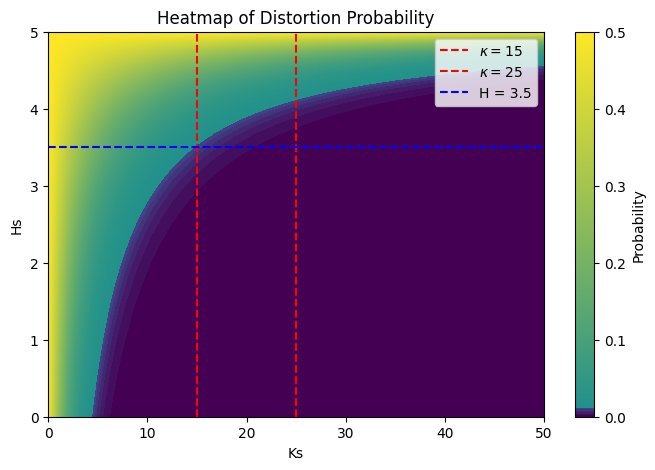

In [8]:
plt.figure(figsize=(8, 5))
plt.pcolormesh(K, H, probs, shading='auto', cmap=custom_cmap)
plt.colorbar(label='Probability')

plt.axvline(x=15, color='red', linestyle='--', label=r'$\kappa = 15$')
plt.axvline(x=25, color='red', linestyle='--', label=r'$\kappa = 25$')
plt.axhline(y=3.5, color='blue', linestyle='--', label='H = 3.5')

plt.xlabel('Ks')
plt.ylabel('Hs')
plt.title('Heatmap of Distortion Probability')

plt.legend()

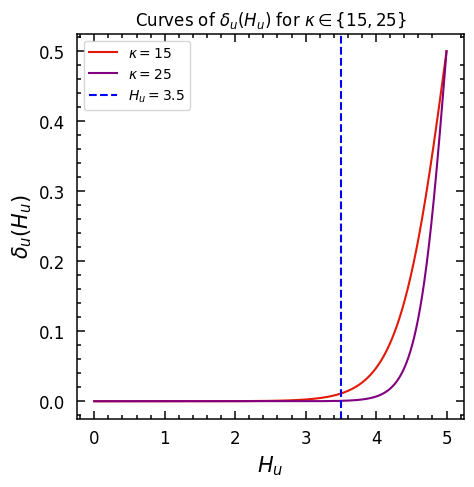

In [6]:
nrows = 1
ncols = 1

axis_width = 1.08
tick_pad = 8
tick_label_size = 12
num_x_ticks = 6
num_y_ticks= 6


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))
fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)


Hs = np.linspace(start = 0, stop = 5, num = 4000)

axs[0].plot(Hs, distortion_probability(15, Hs), color = "#e21907", label = r'$\kappa = 15$')
axs[0].plot(Hs, distortion_probability(25, Hs), color = "purple", label = r'$\kappa = 25$')

axs[0].axvline(x=3.5, color='blue', linestyle='--', label=r'$H_u = 3.5$')

axs[0].set_xlabel(r'$H_{u}$')
axs[0].set_ylabel(r'$\delta_{u}(H_u)$')
axs[0].set_title(r'Curves of $\delta_{u}(H_u)$ for $\kappa \in \{15, 25\}$')

###

# Ks = np.linspace(start = 0, stop = 50, num = 4000)
# Hs = np.linspace(start = 0, stop = 5, num = 4000)
# K, H = np.meshgrid(Ks, Hs)
# probs = distortion_probability(K, H)


# viridis = plt.get_cmap('viridis')
# norm_threshold = (0.01 - probs.min()) / (probs.max() - probs.min())
# cdict = {
#     'red':   [(0.0, viridis(0.0)[0], viridis(0.0)[0]),
#               (norm_threshold, viridis(0.2)[0], viridis(0.5)[0]),
#               (1.0, viridis(1.0)[0], viridis(1.0)[0])],

#     'green': [(0.0, viridis(0.0)[1], viridis(0.0)[1]),
#               (norm_threshold, viridis(0.2)[1], viridis(0.5)[1]),
#               (1.0, viridis(1.0)[1], viridis(1.0)[1])],

#     'blue':  [(0.0, viridis(0.0)[2], viridis(0.0)[2]),
#               (norm_threshold, viridis(0.2)[2], viridis(0.5)[2]),
#               (1.0, viridis(1.0)[2], viridis(1.0)[2])]
# }
# custom_cmap = mcolors.LinearSegmentedColormap('custom_cmap', cdict)

# mesh = axs[1].pcolormesh(K, H, probs, shading='auto', cmap=custom_cmap)
# cbar_ax = fig.add_axes([0.92, 0.11, 0.02, 0.773])
# cbar = fig.colorbar(
#     mesh,
#     cax = cbar_ax
# )

# axs[1].axvline(x=15, color="#e21907", linestyle='--', label=r'$\kappa = 15$')
# axs[1].axvline(x=25, color="purple", linestyle='--', label=r'$\kappa = 25$')
# axs[1].axhline(y=3.5, color='blue', linestyle='--', label='H = 3.5')

# axs[1].scatter(15, 3.5,  c = 'grey', edgecolors = 'k', s = 50)
# axs[1].text(
#     20,
#     3.6,
#     r"$\delta_u = 0.01$", # Format to 2 decimal places
#     color='black',
#     ha='center',
#     va='bottom', # Horizontal and vertical alignment
#     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2')
# ) # Background for readability

# axs[1].scatter(25, 3.5,  c = 'grey', edgecolors = 'k', s = 50)
# axs[1].text(
#     32,
#     3.2,
#     r"$\delta_u = 0.0005$", # Format to 2 decimal places
#     color='black',
#     ha='center',
#     va='bottom', # Horizontal and vertical alignment
#     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2')
# ) # Background for readability

# axs[1].set_xlabel(r'$\kappa$')
# axs[1].set_ylabel(r'$H_{u}$')
# axs[1].set_title(r'Heatmap of $\delta_u(H_{u}, \kappa)$')


axs[0].xaxis.label.set_size(15)
# axs[1].xaxis.label.set_size(15)
axs[0].yaxis.label.set_size(15)
# axs[1].yaxis.label.set_size(15)
axs[0].title.set_size(12)
# axs[1].title.set_size(12)

axs[0].legend(loc = 'upper left', fontsize = 10)
# axs[1].legend(loc = 'upper left', fontsize = 10)

fig.savefig("curves_of_delta_h_kappa.png")

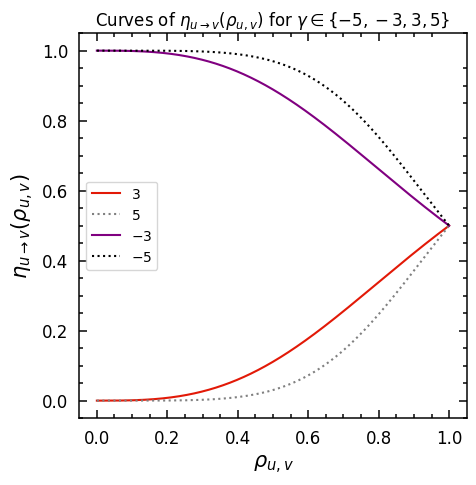

In [7]:
nrows = 1
ncols = 1

axis_width = 1.08
tick_pad = 8
tick_label_size = 12
num_x_ticks = 6
num_y_ticks= 6


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))
fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)


ratios =  np.linspace(start = 0.0001, stop = 1, num = 3000)

axs[0].plot(ratios, acceptance_probability(ratios, 3), color = "#e21907", label = r'$3$')
axs[0].plot(ratios, acceptance_probability(ratios, 5), color = "grey", linestyle = ':', label = r'$5$')

axs[0].plot(ratios, acceptance_probability(ratios, -3), color = "purple", label = r'$-3$')
axs[0].plot(ratios, acceptance_probability(ratios, -5), color = "k", linestyle = ':', label = r'$-5$')

axs[0].set_xlabel(r'$\rho_{u, v}$')
axs[0].set_ylabel(r'$\eta_{u \to v}(\rho_{u, v})$')
axs[0].set_title(r'Curves of $\eta_{u \to v}(\rho_{u, v})$ for $\gamma \in \{-5, -3, 3, 5\}$')

# ratios, gammas = np.meshgrid(
#     np.linspace(start = 0.0001, stop = 1, num = 3000),
#     np.linspace(start = -25, stop = 25, num = 3000)
# )
# probabilities = acceptance_probability(ratios, gammas)

# mesh = axs[1].pcolormesh(ratios, gammas, probabilities, shading='auto', cmap='viridis')
# cbar_ax = fig.add_axes([0.92, 0.11, 0.02, 0.773])
# cbar = fig.colorbar(
#     mesh,
#     cax = cbar_ax
# )

# axs[1].axhline(y=3, color="#e21907", linestyle='--', label=r'$\gamma = 3$')
# axs[1].axhline(y=-3, color="purple", linestyle='--', label=r'$\gamma = -3$')
# axs[1].set_xlabel(r'$\rho_{u}$')
# axs[1].set_ylabel(r'$\gamma$')
# axs[1].set_title(r'Heatmap of $\eta_{u \to v}(\rho_{u, v}, \gamma)$')

axs[0].xaxis.label.set_size(15)
# axs[1].xaxis.label.set_size(15)
axs[0].yaxis.label.set_size(15)
# axs[1].yaxis.label.set_size(15)
axs[0].title.set_size(12)
# axs[1].title.set_size(12)

axs[0].legend(loc = 'center left', fontsize = 10)
# axs[1].legend(loc = 'upper left', fontsize = 10)

fig.savefig("curves_of_eta_rho_gamma.png")

The above expression is an adjusment of the harmonic mean, which is strongly influenced by minimum values. We decided to use it to penalize and asymmetry between proximity and relative popularity among neighbors.

The graph below presents the heatmap and curves of the acceptance probability for fixed $\mathcal{S}(P_u, P_v) = 1.0$ Changing $\mathcal{S}(P_u, P_v)$ affects the maximum probability. We can easily see a symmetrical behavior in the probabilities for negative and positive values of $\gamma$ with equal absolute value, and that $\gamma$ heavily influences the behavior for the majority of the population, since the BA network is mostly composed by nodes with smaller degrees. Positive values of $gamma$ greatly reduces the acceptance probability for unpopular individuals, while negative values of $\gamma$ prioritizes those same individuals. 

In [8]:
import pickle

In [10]:
def f(params, results_path):
    runs = get_runs_paths(params, results_path)
    num_runs = len(runs)
    
    convergence_point = []
    
    for run in runs:
        run_data = pickle.load(open(run, "rb"))
        
        y = np.array(run_data['Entropy'])
        point = np.argwhere(np.abs(y - 4.9) < 0.01)[0].item()
        
        convergence_point.append(point)
        
    return np.mean(convergence_point), np.std(convergence_point)

points = {}

params = parse_experiment_params("./experiments_params/case_6.json")
for param in params:
    try:
        points[param['kappa']] = f(param, "./results/case_6/")
    except:
        pass
    
params = parse_experiment_params("./experiments_params/case_8.json")
for param in params:
    try:
        points[param['kappa']] = f(param, "./results/case_8/")
    except Exception as e:
        print(e)

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


In [11]:
params = parse_experiment_params("experiments_params/large_graph_no_polarized_group_kappa_15_gamma_variation.json")
results = get_experiment_mean_data(params, "results/large_graph_no_polarized_group_kappa_15_gamma_variation/")

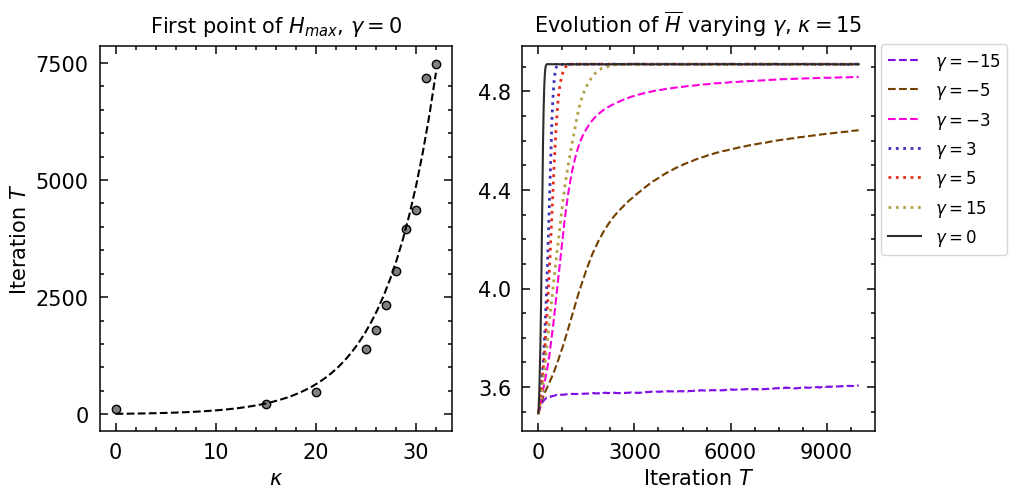

In [15]:
# parameters

nrows = 1
ncols = 2

titles = [r"First point of $H_{max}$, $\gamma = 0$", r"Evolution of $\overline{H}$ varying $\gamma$, $\kappa = 15$"]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"$\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 15
num_x_ticks = 4
num_y_ticks= 4


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

###


x = list(points.keys())
y = [x[0] for x in points.values()]
std = [x[1] for x in points.values()]

# axs[0].errorbar(x, y, yerr = std, fmt = 'o', c = 'grey', edgecolors = 'k')
axs[0].scatter(x, y, marker = 'o', c = 'grey', edgecolors = 'k')
p = np.polyfit(x, np.log(y), 1, w = np.sqrt(y))
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(x), np.max(x), 50)
y_fitted = a * np.exp(b * x_fitted)
axs[0].plot(x_fitted, y_fitted, '--', color = 'k')
axs[0].set_ylabel(r"Iteration $T$")
axs[0].set_xlabel(r"$\kappa$")

# plot
line_width = 2

measure = 'entropy'

gamma_color = {
    0: "#2e2b28",
    1:"#71755b",
    3: "#3B32BD",
    5: "#e92918",
    10:"#23aeb0",
    15:"#b0a244",
    -1:"#0de6df",
    -3: "#FB00DD",
    -5: "#744000",
    -10:"#736768",
    -15:"#810de6",
}


X = np.arange(1, 10000 + 1)

excluded_gammas = [-1, 1, -10, 10]

_params = [x for x in params if x["gamma"] not in excluded_gammas]

negative_gammas = [x for x in _params if x["gamma"] < 0]
positive_gammas = [x for x in _params if x["gamma"] > 0]
zero_gamma = [x for x in _params if x["gamma"] == 0]
###
for p in negative_gammas:
    axs[1].plot(X, results[make_tuple(p)][measure], c = gamma_color[p['gamma']], linewidth = 1.5, linestyle = '--', label = r"$\gamma = {}$".format(p['gamma']))
for p in positive_gammas:
    axs[1].plot(X, results[make_tuple(p)][measure], c = gamma_color[p['gamma']], linewidth = 2, linestyle = ':', label = r"$\gamma = {}$".format(p['gamma']))
for p in zero_gamma:
    axs[1].plot(X, results[make_tuple(p)][measure], c = gamma_color[p['gamma']], linewidth = 1.5, linestyle = '-', label = r"$\gamma = {}$".format(p['gamma']))

axs[1].legend(loc = 'upper right', fontsize = 12, bbox_to_anchor = (1.4, 1.027))

fig.savefig("evolution_of_h_varying_gamma.png")

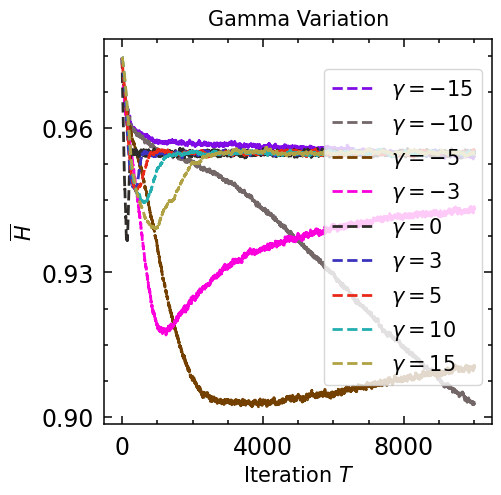

In [8]:
# parameters

nrows = 1
ncols = 1

titles = [rf"Gamma Variation"]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"$\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# plot
line_width = 2

measure = 'proximity'

gamma_color = {
    0: "#2e2b28",
    3: "#3B32BD",
    5: "#e92918",
    10:"#23aeb0",
    15:"#b0a244",
    -3: "#FB00DD",
    -5: "#744000",
    -10:"#736768",
    -15:"#810de6",
}


X = np.arange(1, 10000 + 1)

###
for p in params:
    axs[0].plot(X, results[make_tuple(p)][measure], c = gamma_color[p['gamma']], linewidth = line_width, linestyle = '--', label = r"$\gamma = {}$".format(p['gamma']))

axs[0].legend(loc = 'upper right', fontsize = 15, bbox_to_anchor = (1, 0.95))

# fig.savefig("temp.png")